In [24]:
import CalculatedFieldSubroutines as routines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px

import seaborn as sns

import sklearn
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,balanced_accuracy_score, f1_score,precision_recall_curve

### Read and preprocces data


In [25]:
gmIDs = [ #top 9 reds
    "51ef6da6-ca9f-11ee-909c-e1dc60cf66f9",
    "d12cd1c4-caec-11ee-909c-e1dc60cf66f9",
    "6d2ea45a-c839-11ee-a7fc-dd032dba19e8",
    "c9c6856c-d33c-11ee-b437-336917683bb8",
    "7fb7b9c0-c881-11ee-a7fc-dd032dba19e8",
    "8437f77a-cab7-11ee-909c-e1dc60cf66f9",
    "c338788a-d324-11ee-b437-336917683bb8",
    "853ef120-cad3-11ee-909c-e1dc60cf66f9",
    "8fa6fe80-c869-11ee-a7fc-dd032dba19e8",
]

#gmIDs = [ # 52 runs from blue route
#"06cbdbc0-db4d-11ee-a158-97f8443fd730",
#"baf0e4be-bede-11ee-835b-599066b5eb60",
#"6af236d6-d98f-11ee-a158-97f8443fd730",
#"39ba7438-d0d5-11ee-9435-f7e542e2436c",
#"c0624e24-d9aa-11ee-a158-97f8443fd730",
#"19b7ebd0-d9b7-11ee-a158-97f8443fd730",
#"47561998-d9c3-11ee-a158-97f8443fd730",
#"dc39aa14-db32-11ee-a158-97f8443fd730",
#"e6d7d384-db40-11ee-a158-97f8443fd730",
#"68c289fa-dbd4-11ee-a158-97f8443fd730",
#"aa86a660-dc05-11ee-a158-97f8443fd730",
#"a17c1280-ea10-11ee-b297-3b0ad9d5d6c6",
#"3ea96640-ea37-11ee-b297-3b0ad9d5d6c6",
#"17876fec-ea66-11ee-b297-3b0ad9d5d6c6",
#"5fcc4fd8-ea71-11ee-b297-3b0ad9d5d6c6",
#"36663b02-ea87-11ee-b297-3b0ad9d5d6c6",
#"cf6fdf3a-eaa3-11ee-b297-3b0ad9d5d6c6",
#"fc119dfc-eb67-11ee-b297-3b0ad9d5d6c6",
#"75f83e28-eb77-11ee-b297-3b0ad9d5d6c6",
#"3343fd3c-eb87-11ee-b297-3b0ad9d5d6c6",
#"2d35c522-eba2-11ee-b297-3b0ad9d5d6c6",
#"af10e22a-ebb1-11ee-b297-3b0ad9d5d6c6",
#"a7c98b32-ebc2-11ee-b297-3b0ad9d5d6c6",
#"c8f54ac0-ebd2-11ee-b297-3b0ad9d5d6c6",
#"c7c02bda-ebe0-11ee-b297-3b0ad9d5d6c6",
#"7228e03a-ebf0-11ee-b297-3b0ad9d5d6c6",
#"21376e38-ec01-11ee-b297-3b0ad9d5d6c6",
#"b224ef9c-ec10-11ee-b297-3b0ad9d5d6c6",
#"04151804-ec20-11ee-b297-3b0ad9d5d6c6",
#"e9d67bf2-ec35-11ee-b297-3b0ad9d5d6c6",
#"cb205756-ec43-11ee-b297-3b0ad9d5d6c6",
#"20f0b890-ec64-11ee-b297-3b0ad9d5d6c6",
#"4d0254fc-ec73-11ee-b297-3b0ad9d5d6c6",
#"3d2a80f0-ec81-11ee-b297-3b0ad9d5d6c6",
#"6d62da08-ec9d-11ee-b297-3b0ad9d5d6c6",
#"25d3bdc8-ecbc-11ee-b297-3b0ad9d5d6c6",
#"3441fc36-ecca-11ee-b297-3b0ad9d5d6c6",
#"326699c2-ecd8-11ee-b297-3b0ad9d5d6c6",
#"721a9830-ece6-11ee-b297-3b0ad9d5d6c6",
#"acd71bc0-ecf4-11ee-9385-ef789ffde1d3",
#"d62ee6e8-ed02-11ee-9385-ef789ffde1d3",
#"5f6573ba-ed2f-11ee-9385-ef789ffde1d3",
#"59c189d8-ed54-11ee-9385-ef789ffde1d3",
#"d94ef300-ed60-11ee-9385-ef789ffde1d3",
#"8b6a6cfc-ed6d-11ee-9385-ef789ffde1d3",
#"530de03a-ed79-11ee-9385-ef789ffde1d3",
#"43914d48-ed85-11ee-9385-ef789ffde1d3",
#"e269948a-ed9d-11ee-9385-ef789ffde1d3",
#"60546ef4-edaa-11ee-9385-ef789ffde1d3",
#"e8a8b2be-edbf-11ee-9385-ef789ffde1d3",
#"7613801a-edcb-11ee-9385-ef789ffde1d3",
#"aef91c4a-ede5-11ee-9385-ef789ffde1d3"
#]
#
gmIDs = [
#    
"2462c9d0-eecd-11ee-9385-ef789ffde1d3",
"94c53148-eeed-11ee-9385-ef789ffde1d3",
"aa5dbcd2-ef10-11ee-9385-ef789ffde1d3",
"d3698592-ef9d-11ee-b966-fb353e7798cd",
"be857244-efc0-11ee-b966-fb353e7798cd",
"fc211bb2-efca-11ee-b966-fb353e7798cd",
"72a03d4a-efe9-11ee-b966-fb353e7798cd",
"5a4bccf4-effe-11ee-b966-fb353e7798cd",
"2f95c748-f009-11ee-b966-fb353e7798cd",
"8dbbbf1c-f0ef-11ee-ba29-fb353e7798cd",
"d21965e6-f0fa-11ee-ba37-fb353e7798cd",
"171c50bc-f106-11ee-ba42-fb353e7798cd",
"de933de8-f112-11ee-ba4d-fb353e7798cd",
"9189a2a8-f121-11ee-ba5b-fb353e7798cd",
"9798fe24-f143-11ee-ba78-fb353e7798cd",
"35518ec4-f153-11ee-ba88-fb353e7798cd",
"ecebb942-f162-11ee-ba97-fb353e7798cd",
"d24820c8-f197-11ee-babe-fb353e7798cd",
"b82476fe-f1f3-11ee-baff-fb353e7798cd",
"84d96f18-f214-11ee-bb13-fb353e7798cd",
"88dd6fbe-f224-11ee-bb21-fb353e7798cd",
"61b12e7a-f234-11ee-bb33-fb353e7798cd",
"7cbd932e-f244-11ee-bb3f-fb353e7798cd",
"cf831f42-f353-11ee-bb4e-fb353e7798cd",
"43a1a35e-f362-11ee-bb4e-fb353e7798cd",
"65cfbfd6-f396-11ee-bb4e-fb353e7798cd",
"c25271be-f3a4-11ee-bb4e-fb353e7798cd",
"868de15e-f3b3-11ee-bb4e-fb353e7798cd",
"3344a3c0-f502-11ee-8afa-cb629b0d53e6",
"ce6465b6-f51b-11ee-8afa-cb629b0d53e6",
"fe973c9c-f53c-11ee-8afa-cb629b0d53e6",
"96f7a614-f549-11ee-8afa-cb629b0d53e6",    
#    
#    
]


final_df = pd.DataFrame()

for gmID in gmIDs:
    print(gmID)
    df_chassis = pd.read_csv(f'../data/{gmID}/_apollo_canbus_chassis/{gmID}_apollo_canbus_chassis.csv')
    df_pose = pd.read_csv(f'../data/{gmID}/_apollo_sensor_gnss_best_pose/{gmID}_apollo_sensor_gnss_best_pose.csv')
    
    df_chassis.sort_values(by='time', inplace=True)
    df_pose.sort_values(by='time', inplace=True)

    routines.BinaryDrivingMode(df_chassis)
    
    routines.TernaryDrivingModeTransition(df_chassis)
    routines.LatLonTotalStdDev(df_pose)
    routines.ChassisBestPoseMatchedTime(df_chassis, df_pose)
    
    merged_df = pd.merge(df_chassis, df_pose, on='ChassisBestPoseMatchedTime')
    
    final_df = pd.concat([final_df, merged_df])
    
final_df.shape

2462c9d0-eecd-11ee-9385-ef789ffde1d3
94c53148-eeed-11ee-9385-ef789ffde1d3
aa5dbcd2-ef10-11ee-9385-ef789ffde1d3
d3698592-ef9d-11ee-b966-fb353e7798cd
be857244-efc0-11ee-b966-fb353e7798cd
fc211bb2-efca-11ee-b966-fb353e7798cd
72a03d4a-efe9-11ee-b966-fb353e7798cd
5a4bccf4-effe-11ee-b966-fb353e7798cd
2f95c748-f009-11ee-b966-fb353e7798cd
8dbbbf1c-f0ef-11ee-ba29-fb353e7798cd
d21965e6-f0fa-11ee-ba37-fb353e7798cd
171c50bc-f106-11ee-ba42-fb353e7798cd
de933de8-f112-11ee-ba4d-fb353e7798cd
9189a2a8-f121-11ee-ba5b-fb353e7798cd
9798fe24-f143-11ee-ba78-fb353e7798cd
35518ec4-f153-11ee-ba88-fb353e7798cd
ecebb942-f162-11ee-ba97-fb353e7798cd
d24820c8-f197-11ee-babe-fb353e7798cd
b82476fe-f1f3-11ee-baff-fb353e7798cd
84d96f18-f214-11ee-bb13-fb353e7798cd
88dd6fbe-f224-11ee-bb21-fb353e7798cd
61b12e7a-f234-11ee-bb33-fb353e7798cd
7cbd932e-f244-11ee-bb3f-fb353e7798cd
cf831f42-f353-11ee-bb4e-fb353e7798cd
43a1a35e-f362-11ee-bb4e-fb353e7798cd
65cfbfd6-f396-11ee-bb4e-fb353e7798cd
c25271be-f3a4-11ee-bb4e-fb353e7798cd
8

(1712611, 24)

In [55]:
len(gmIDs)

32

In [56]:
final_df['drivingMode'] = np.where(final_df['BinaryDrivingMode'] == 0, "Manual", "Autonomous")
final_df['TernaryDrivingModeTransition'] = final_df['TernaryDrivingModeTransition'].astype(str)

In [57]:
final_df

,brakePercentage,groupMetadataID_x,drivingMode,speedMps,time_x,throttlePercentage,steeringPercentage,signal.turnSignal,BinaryDrivingMode,TernaryDrivingModeTransition,...,signal.turnSignal_TURN_RIGHT,solStatus_COV_TRACE,solStatus_INSUFFICIENT_OBS,solStatus_SOL_COMPUTED,solType_L1_FLOAT,solType_NARROW_FLOAT,solType_NARROW_INT,solType_PSRDIFF,solType_SINGLE,solType_WIDE_INT
0,0.0,2462c9d0-eecd-11ee-9385-ef789ffde1d3,Manual,0.00,1690903589432104536,0.0,36.767876,TURN_NONE,0,0,...,False,False,False,True,False,False,True,False,False,False
1,0.0,2462c9d0-eecd-11ee-9385-ef789ffde1d3,Manual,0.00,1690903589463993210,0.0,36.767876,TURN_NONE,0,0,...,False,False,False,True,False,False,True,False,False,False
2,0.0,2462c9d0-eecd-11ee-9385-ef789ffde1d3,Manual,0.00,1690903589498481004,0.0,36.767876,TURN_NONE,0,0,...,False,False,False,True,False,False,True,False,False,False
3,0.0,2462c9d0-eecd-11ee-9385-ef789ffde1d3,Manual,0.00,1690903589530108858,0.0,36.767876,TURN_NONE,0,0,...,False,False,False,True,False,False,True,False,False,False
4,0.0,2462c9d0-eecd-11ee-9385-ef789ffde1d3,Manual,0.00,1690903589564162017,0.0,36.767876,TURN_NONE,0,0,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53414,15.2,96f7a614-f549-11ee-8afa-cb629b0d53e6,Manual,4.89,1697574302259246686,0.0,-35.808033,TURN_RIGHT,0,0,...,True,False,False,True,False,False,True,False,False,False
53415,15.2,96f7a614-f549-11ee-8afa-cb629b0d53e6,Manual,4.79,1697574302297126228,0.0,-34.750244,TURN_RIGHT,0,0,...,True,False,False,True,False,False,True,False,False,False
53416,15.2,96f7a614-f549-11ee-8afa-cb629b0d53e6,Manual,4.79,1697574302325152742,0.0,-33.290890,TURN_RIGHT,0,0,...,True,False,False,True,False,False,True,False,False,False
53417,15.2,96f7a614-f549-11ee-8afa-cb629b0d53e6,Manual,4.76,1697574302359199546,0.0,-32.213516,TURN_RIGHT,0,0,...,True,False,False,True,False,False,True,False,False,False


In [58]:
print(final_df["BinaryDrivingMode"].value_counts())
print(final_df["TernaryDrivingModeTransition"].value_counts())

BinaryDrivingMode
1    1371265
0     341346
Name: count, dtype: int64
TernaryDrivingModeTransition
0     1711920
1         346
-1        345
Name: count, dtype: int64


In [59]:
one_hot = pd.get_dummies(final_df[['signal.turnSignal', "solStatus", "solType"]])
one_hot

,signal.turnSignal_TURN_LEFT,signal.turnSignal_TURN_NONE,signal.turnSignal_TURN_RIGHT,solStatus_COV_TRACE,solStatus_INSUFFICIENT_OBS,solStatus_SOL_COMPUTED,solType_L1_FLOAT,solType_NARROW_FLOAT,solType_NARROW_INT,solType_PSRDIFF,solType_SINGLE,solType_WIDE_INT
0,False,True,False,False,False,True,False,False,True,False,False,False
1,False,True,False,False,False,True,False,False,True,False,False,False
2,False,True,False,False,False,True,False,False,True,False,False,False
3,False,True,False,False,False,True,False,False,True,False,False,False
4,False,True,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
53414,False,False,True,False,False,True,False,False,True,False,False,False
53415,False,False,True,False,False,True,False,False,True,False,False,False
53416,False,False,True,False,False,True,False,False,True,False,False,False
53417,False,False,True,False,False,True,False,False,True,False,False,False


In [60]:
final_df[one_hot.columns] = one_hot
final_df

,brakePercentage,groupMetadataID_x,drivingMode,speedMps,time_x,throttlePercentage,steeringPercentage,signal.turnSignal,BinaryDrivingMode,TernaryDrivingModeTransition,...,signal.turnSignal_TURN_RIGHT,solStatus_COV_TRACE,solStatus_INSUFFICIENT_OBS,solStatus_SOL_COMPUTED,solType_L1_FLOAT,solType_NARROW_FLOAT,solType_NARROW_INT,solType_PSRDIFF,solType_SINGLE,solType_WIDE_INT
0,0.0,2462c9d0-eecd-11ee-9385-ef789ffde1d3,Manual,0.00,1690903589432104536,0.0,36.767876,TURN_NONE,0,0,...,False,False,False,True,False,False,True,False,False,False
1,0.0,2462c9d0-eecd-11ee-9385-ef789ffde1d3,Manual,0.00,1690903589463993210,0.0,36.767876,TURN_NONE,0,0,...,False,False,False,True,False,False,True,False,False,False
2,0.0,2462c9d0-eecd-11ee-9385-ef789ffde1d3,Manual,0.00,1690903589498481004,0.0,36.767876,TURN_NONE,0,0,...,False,False,False,True,False,False,True,False,False,False
3,0.0,2462c9d0-eecd-11ee-9385-ef789ffde1d3,Manual,0.00,1690903589530108858,0.0,36.767876,TURN_NONE,0,0,...,False,False,False,True,False,False,True,False,False,False
4,0.0,2462c9d0-eecd-11ee-9385-ef789ffde1d3,Manual,0.00,1690903589564162017,0.0,36.767876,TURN_NONE,0,0,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53414,15.2,96f7a614-f549-11ee-8afa-cb629b0d53e6,Manual,4.89,1697574302259246686,0.0,-35.808033,TURN_RIGHT,0,0,...,True,False,False,True,False,False,True,False,False,False
53415,15.2,96f7a614-f549-11ee-8afa-cb629b0d53e6,Manual,4.79,1697574302297126228,0.0,-34.750244,TURN_RIGHT,0,0,...,True,False,False,True,False,False,True,False,False,False
53416,15.2,96f7a614-f549-11ee-8afa-cb629b0d53e6,Manual,4.79,1697574302325152742,0.0,-33.290890,TURN_RIGHT,0,0,...,True,False,False,True,False,False,True,False,False,False
53417,15.2,96f7a614-f549-11ee-8afa-cb629b0d53e6,Manual,4.76,1697574302359199546,0.0,-32.213516,TURN_RIGHT,0,0,...,True,False,False,True,False,False,True,False,False,False


In [61]:
x_cols = [
"brakePercentage",
##"groupMetadataID_x",
##"drivingMode",
"speedMps",
##"time_x",
"throttlePercentage",
"steeringPercentage",

##"signal.turnSignal",
##"BinaryDrivingMode",
##"TernaryDrivingModeTransition",
##"ChassisBestPoseMatchedTime",
##"heightMsl",
##"groupMetadataID_y",
##"latitudeStdDev",
##"longitude",
##"solType",
#"extendedSolutionStatus",
##"time_y",
##"heightStdDev",
##"solStatus",
##"latitude",
##"longitudeStdDev",
#"numSatsInSolution",
"LatLonTotalStdDev",

##"signal.turnSignal_TURN_LEFT",

#"signal.turnSignal_TURN_NONE",

##"signal.turnSignal_TURN_RIGHT",

#"solStatus_COV_TRACE",
#"solStatus_INSUFFICIENT_OBS",
#"solStatus_SOL_COMPUTED",
#"solType_NARROW_FLOAT",
#"solType_NARROW_INT",
#"solType_PSRDIFF",
#"solType_SINGLE",
]

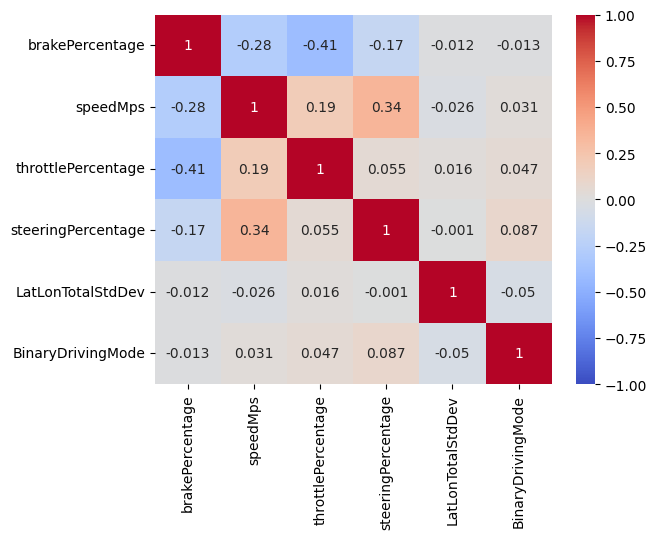

In [62]:
corr_matrix = final_df[x_cols + ["BinaryDrivingMode"]].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

## Split into train and test


In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

train_test = .2
split = int(len(gmIDs)*.7)

print(split)

# training split of whole routes


temp_train = final_df[final_df["groupMetadataID_x"].isin(gmIDs[:split])]

X = temp_train[x_cols]
y = temp_train["BinaryDrivingMode"]


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=train_test, random_state=0)

X_train

22


,brakePercentage,speedMps,throttlePercentage,steeringPercentage,LatLonTotalStdDev
1726,0.0,13.25,3.4,5.239961,0.060036
20846,0.0,9.24,0.0,-1.723800,0.063095
344,0.0,2.34,0.0,55.690500,0.032055
23086,6.1,15.75,0.0,0.558276,0.033569
39020,0.0,27.00,18.8,-0.117532,0.037119
...,...,...,...,...,...
44854,0.0,26.68,17.2,-0.058766,0.034289
44440,0.0,26.19,22.9,-0.646425,0.031481
3867,0.0,19.90,18.0,1.380999,0.039458
10077,0.0,17.78,12.3,1.194907,0.053913


In [64]:
print(temp_train["BinaryDrivingMode"].value_counts(sort="BinaryDrivingMode"))
print(temp_train["TernaryDrivingModeTransition"].value_counts(sort="TernaryDrivingModeTransition"))

BinaryDrivingMode
1    928529
0    249829
Name: count, dtype: int64
TernaryDrivingModeTransition
0     1177873
-1        243
1         242
Name: count, dtype: int64


In [65]:
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 10, 2),
    'min_samples_split': range(2, 10, 2),
    'criterion': ["gini"],
}

Dtree = DecisionTreeClassifier(class_weight='balanced', random_state=0)

grid_search = HalvingGridSearchCV(estimator=Dtree, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

# Best score and estimator
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 11638
max_resources_: 942686
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 180
n_resources: 11638
Fitting 5 folds for each of 180 candidates, totalling 900 fits
----------
iter: 1
n_candidates: 60
n_resources: 34914
Fitting 5 folds for each of 60 candidates, totalling 300 fits
----------
iter: 2
n_candidates: 20
n_resources: 104742
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 3
n_candidates: 7
n_resources: 314226
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 4
n_candidates: 3
n_resources: 942678
Fitting 5 folds for each of 3 candidates, totalling 15 fits
best accuracy 0.8400171418460836
DecisionTreeClassifier(class_weight='balanced', max_depth=9, random_state=0)


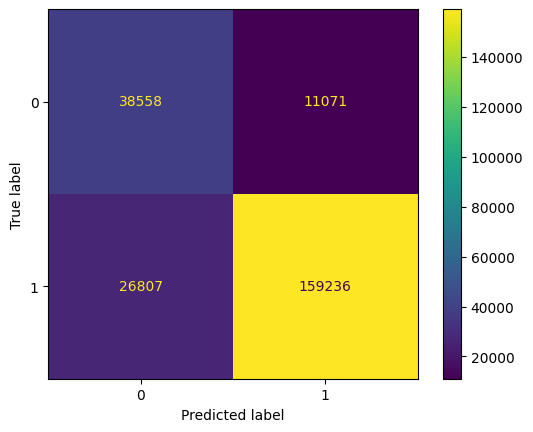

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred = grid_search.predict(X_val)
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()
plt.show()

In [67]:
acccuracy = accuracy_score(y_val, y_pred)
balanced_acccuracy = balanced_accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
precision, recall, thresholds = precision_recall_curve(y_val, y_pred)


print(f"precision: {precision[1]}")
print(f"recall: {recall[1]}")
print(f"f1: {f1}")

print(f'acccuracy: {acccuracy}')
print(f'balanced_acccuracy: {balanced_acccuracy}')

precision: 0.9349938640220308
recall: 0.8559096552947437
f1: 0.8937056264908096
acccuracy: 0.8392766217454768
balanced_acccuracy: 0.8164172185881524


## Testing other dataset


In [68]:
temp_test = final_df[final_df["groupMetadataID_x"].isin(gmIDs[split:])]

In [69]:
print(temp_test["BinaryDrivingMode"].value_counts(sort=False))
print(temp_test["TernaryDrivingModeTransition"].value_counts(sort=False))

BinaryDrivingMode
1    442736
0     91517
Name: count, dtype: int64
TernaryDrivingModeTransition
0     534047
-1       102
1        104
Name: count, dtype: int64


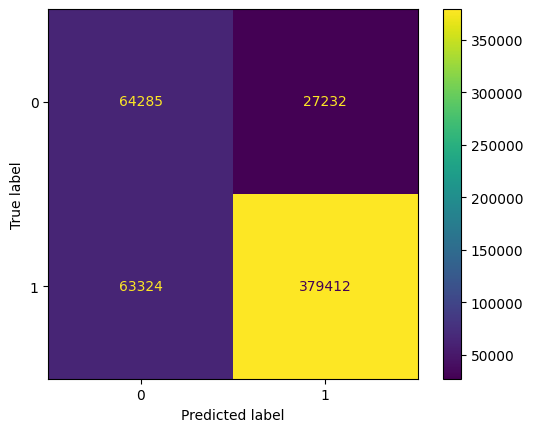

In [70]:
X_test = temp_test[x_cols]
y_test = temp_test["BinaryDrivingMode"]

y_test_pred = grid_search.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()
plt.show()

In [71]:
acccuracy = accuracy_score(y_test, y_test_pred)
balanced_acccuracy = balanced_accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision, recall, thresholds = precision_recall_curve(y_test, y_test_pred)


print(f"precision: {precision[1]}")
print(f"recall: {recall[1]}")
print(f"f1: {f1}")

print(f'acccuracy: {acccuracy}')
print(f'balanced_acccuracy: {balanced_acccuracy}')

precision: 0.9330323329497054
recall: 0.8569711972823534
f1: 0.8933857637335468
acccuracy: 0.8304997819385198
balanced_acccuracy: 0.7797044978620864


## Map comparison


"brakePercentage",
"speedMps",
"throttlePercentage",
"steeringPercentage",


In [44]:
fig = px.scatter_mapbox(final_df[(final_df["groupMetadataID_x"] == gmIDs[split]) & (final_df["BinaryDrivingMode"] == 0)],
                    lat="latitude",
                    lon="longitude",
                    #hover_data=["groupMetadataID_y", "time_y", "drivingMode", "BinaryDrivingMode", "TernaryDrivingModeTransition"],
                    #color="groupMetadataID_y",
                    color="drivingMode",
                    
                    #size='brakePercentage',
                    zoom=11.5,
                    height=600,
                    width=750,
                    # color_discrete_map={
                    #   "M->A"xs: "#63ACBE",
                    #   "A->M": "#601A4A",
                    #   "ERROR": "#EE442F",
                    #   "NONE":"yellowgreen",
                    # }
                    color_discrete_map={
                        #"0": "#601A4A",
                        #"1": "#63ACBE",
                        
                        "Manual": "#601A4A",
                        "Autonomous": "#63ACBE",
                        #"EMERGENCY_MODE": "#EE442F",
                    },
                )

    # Layout settings
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

#fig.update_traces(marker=dict( opacity=.5))
fig.update_traces(marker=dict( size = 8, opacity=1))



fig.show()

In [45]:
print(gmIDs[split])
prep = final_df[final_df["groupMetadataID_x"] == gmIDs[split]].copy()

prep["BinaryDrivingMode"] = y_test_pred
prep['drivingMode'] = np.where(prep['BinaryDrivingMode'] == 0, "Manual", "Autonomous")

fig = px.scatter_mapbox(prep[prep["BinaryDrivingMode"].isin([0])],
                    lat="latitude",
                    lon="longitude",
                    #hover_data=["groupMetadataID_y", "time_y", "drivingMode", "BinaryDrivingMode", "TernaryDrivingModeTransition"],
                    #color="groupMetadataID_y",
                    color="drivingMode",
                    
                    #size='brakePercentage',
                    zoom=11.5,
                    height=600,
                    width=750,
                    # color_discrete_map={
                    #   "M->A": "#63ACBE",
                    #   "A->M": "#601A4A",
                    #   "ERROR": "#EE442F",
                    #   "NONE":"yellowgreen",
                    # }
                    color_discrete_map={
                        #"0": "#601A4A",
                        #"1": "#63ACBE",
                        
                        "Manual": "#601A4A",
                        "Autonomous": "#63ACBE",
                        #"EMERGENCY_MODE": "#EE442F",
                    },
                )

    # Layout settings
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

#fig.update_traces(marker=dict( opacity=.5))
fig.update_traces(marker=dict( size = 8, opacity=1))



fig.show()

7cbd932e-f244-11ee-bb3f-fb353e7798cd
